In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
from pyfonts import load_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects

In [2]:
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-04-01/pokemon_df.csv")

In [3]:
df = pokemon_df.groupby(["type_1"])[["hp","attack","defense","special_attack","special_defense","speed"]].mean().reset_index()

In [4]:
df["total"] = df.sum(numeric_only=True, axis=1).astype(int)

In [5]:
df = df.sort_values(by=["total"], ascending=False).reset_index().drop(columns=["index"])

In [6]:
df.columns = [col.replace('_', '\n') for col in df.columns]

In [7]:
df.head(2)

,type\n1,hp,attack,defense,special\nattack,special\ndefense,speed,total
0,dragon,84.461538,108.666667,89.282051,93.384615,88.282051,82.871795,546
1,steel,67.266667,93.133333,124.833333,73.000000,83.600000,56.100000,497


In [8]:
bangers = load_font(
    font_url="https://github.com/google/fonts/blob/main/ofl/bangers/Bangers-Regular.ttf?raw=true"
)
pokemon_solid = load_font(
    font_url="https://github.com/AlbertoBalaguerUnir/pokemon/blob/main/Pokemon_Solid.ttf?raw=true"
)

In [9]:
categories = list(df.columns[1:7])  
N = len(categories)

In [10]:
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  

In [11]:
color_dict = {
   "dragon": "#4d5cdb",
   "steel": "#5fa0b6",
   "flying": "#79b7f2",
   "ground": "#934f1e",
   "psychic": "#ee427c",
   "fire": "#e52b1f",
   "rock": "#b7ae83",
   "ice": "#3bcef9",
   "ghost": "#743d77",
   "dark": "#624e50",
   "water": "#327ef6",
   "fighting": "#ff8100",
   "grass": "#3aa229",
   "electric": "#ffc60b",
   "fairy": "#ee6dee",
   "normal": "#a3a5a2",
   "poison": "#9342cd",
   "bug": "#91a60b" 
}
colors = df["type\n1"].map(color_dict) 

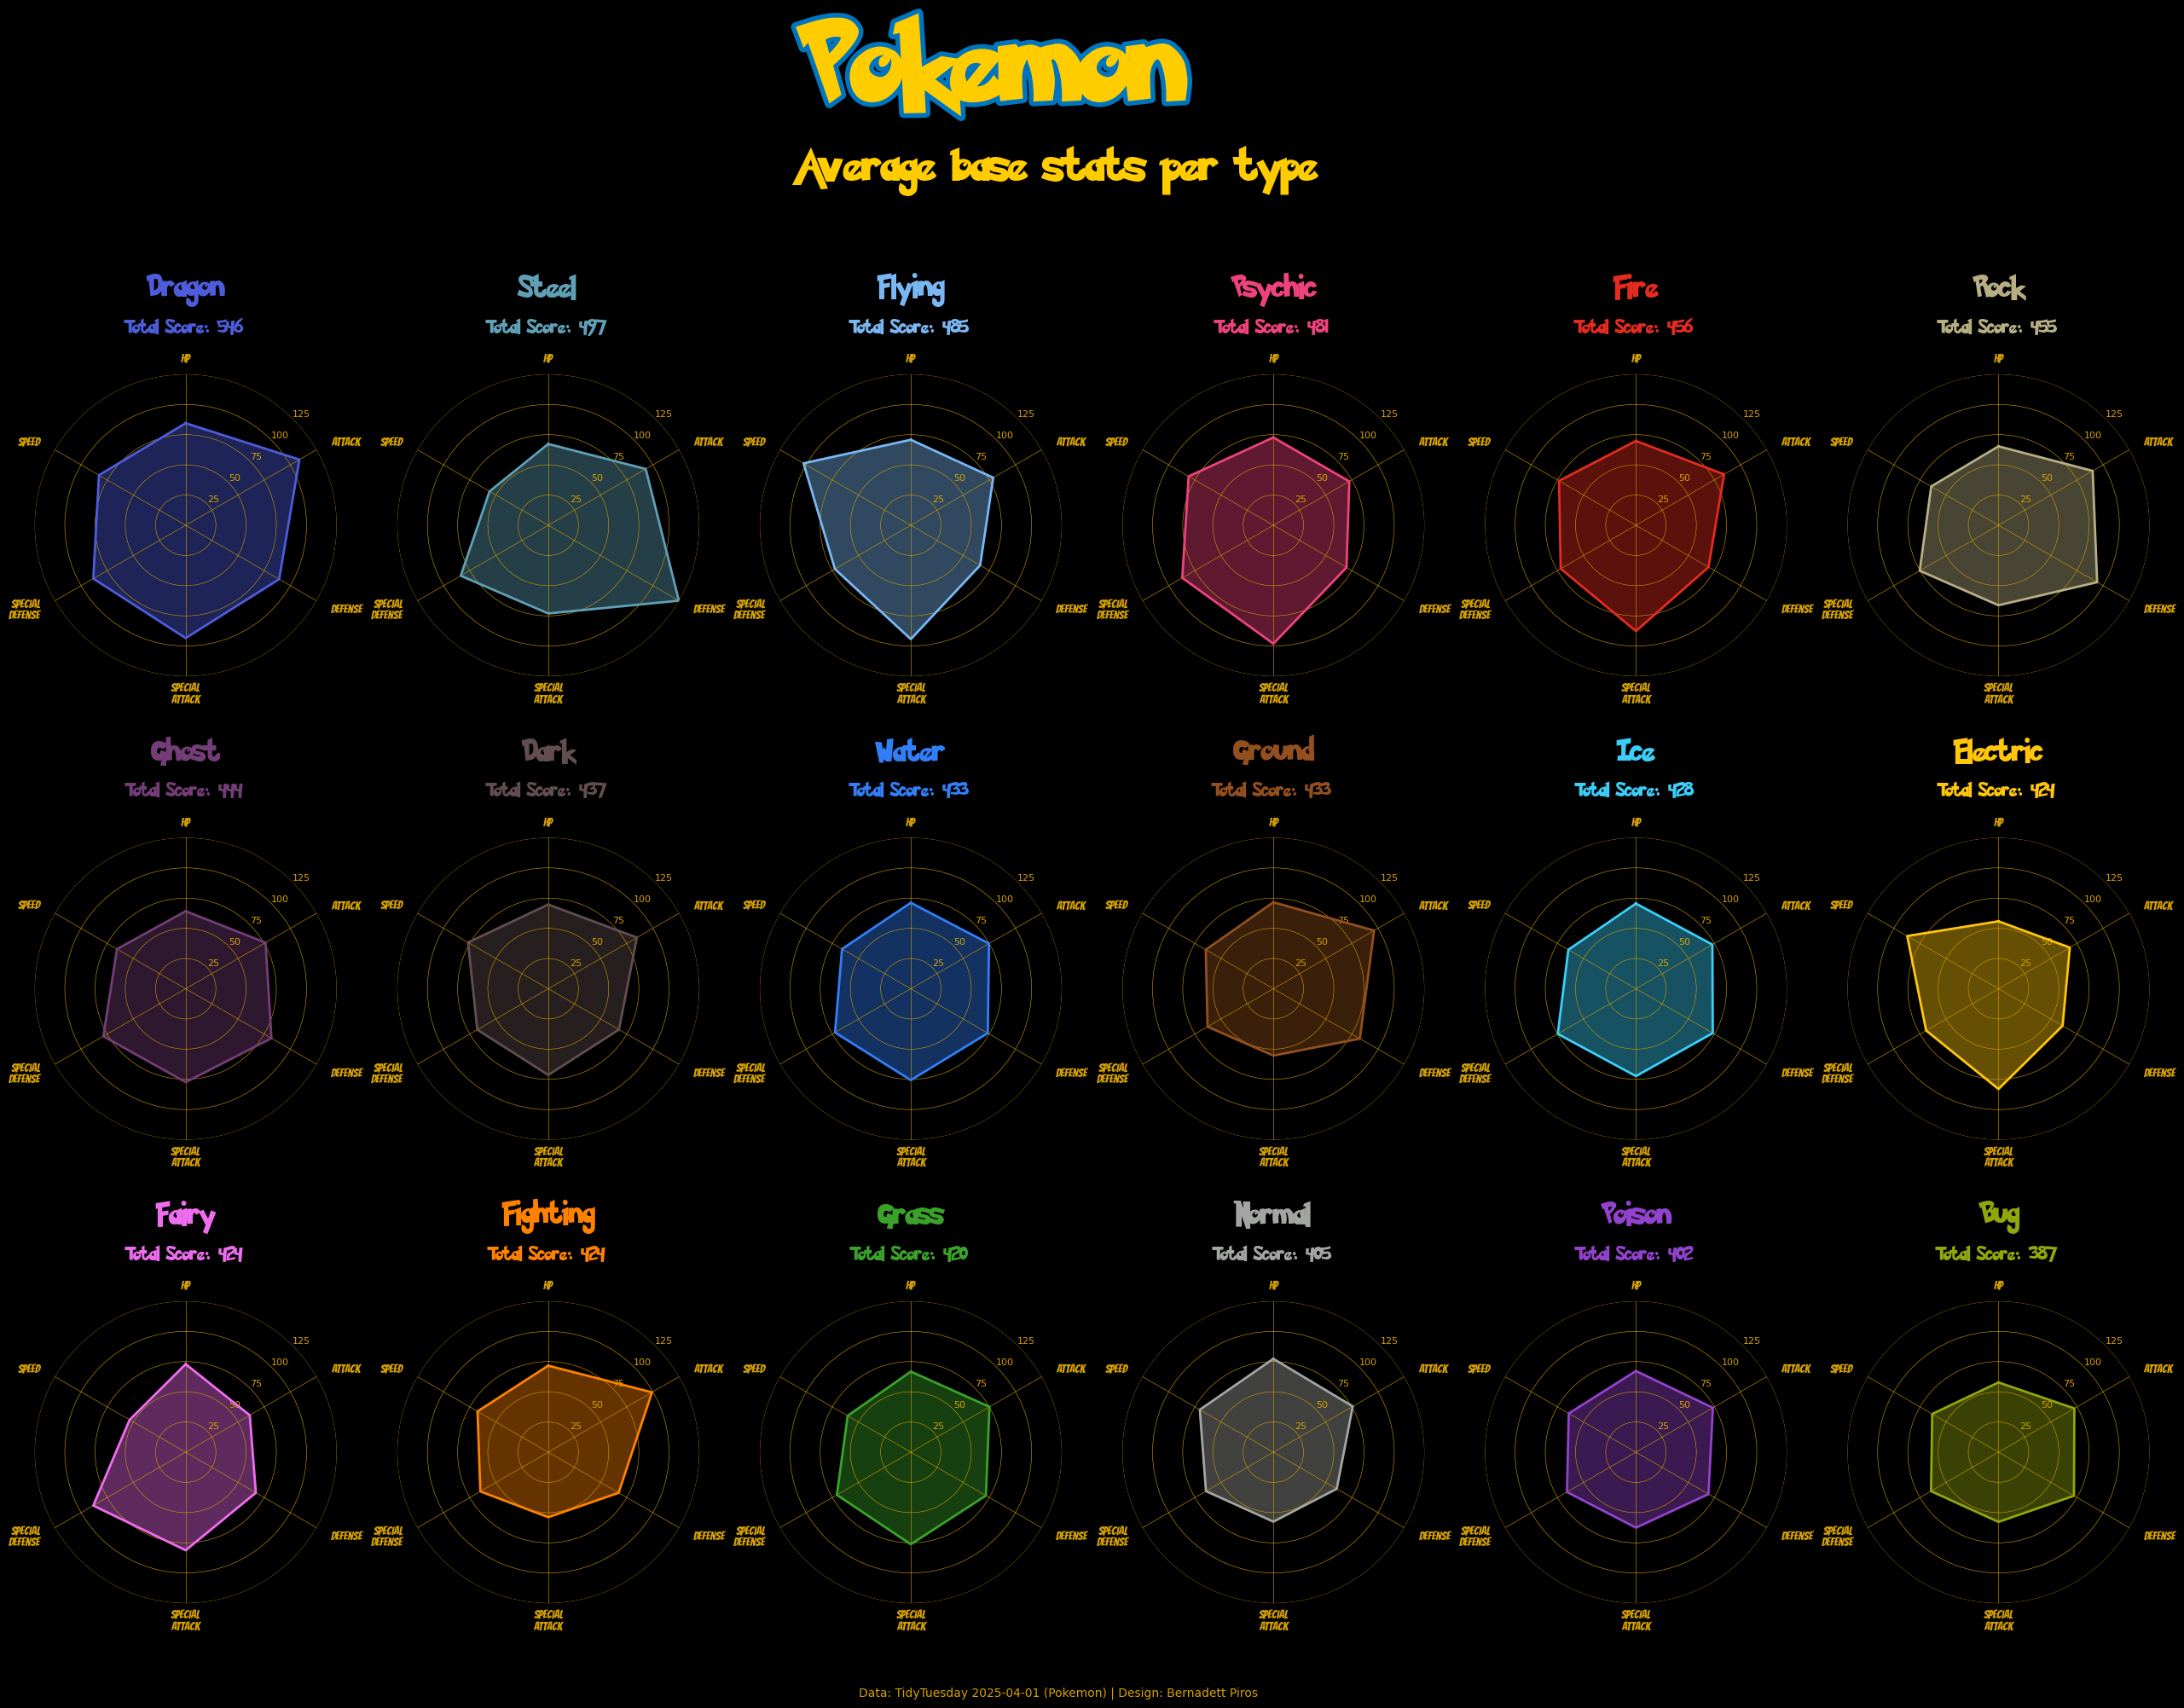

In [12]:
fig, axs = plt.subplots(3, 6, subplot_kw=dict(polar=True), figsize=(32, 20))

for i, ax in enumerate(axs.flat):
    values = df.iloc[i, 1:7].values.flatten().tolist()
    values += values[:1]  

    score_value = df.iloc[i, 7]

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='#D5A100', font=bangers, size=10)

    ax.set_rlabel_position(45)
        
    ax.set_yticks([25, 50, 75, 100, 125], ["25", "50", "75", "100", "125"], color="#D5A100", size=8)
    ax.set_ylim(0, 125)

    ax.spines["polar"].set_color("none")

    ax.yaxis.grid(True, color="#D5A100", lw=0.4)
    ax.xaxis.grid(True, color="#D5A100", lw=0.4)

    color = colors.iloc[i]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    ax.set_title(df["type\n1"][i].title(), color=color, font=pokemon_solid, size=20, y=1.2, va="bottom")    
    ax.text(s=f'Total Score: {score_value}', color=color, font=pokemon_solid, size=12, y=155, x=333, va="bottom", ha="center")   
      
    ax.set_facecolor("#000000")
    fig.set_facecolor("#000000")

def define_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]


my_path_effect = define_path_effect(
    linewidth=8,
    foreground="#0075BE")
        
fig_text(0.5, 0.96, s="<Pokemon>\nAverage base stats per type", color="#FFCC00", font=pokemon_solid, size=30, va="bottom", ha="center",
         highlight_textprops=[
             {"path_effects": my_path_effect, "size": 80}
             ])

fig.text(0.5, 0.08, "Data: TidyTuesday 2025-04-01 (Pokemon) | Design: Bernadett Piros", ha="center", color="#D5A100", size=10)

plt.show()
#fig.savefig("2025-04-01.png", bbox_inches='tight', pad_inches=0.2)